In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_colwidth', 50)

import nltk
from nltk import word_tokenize

# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
import re # for cleaning textual data (uses regular expressions ouch!)
from collections import Counter # for counting tokens occurences
import math # for calculations

import nltk
from nltk.tokenize import word_tokenize # for tokenization
from nltk.corpus import stopwords
from nltk.probability import FreqDist # for overall tokens frequency
from nltk.tokenize import RegexpTokenizer 

import gensim
from gensim import corpora # for: Dictionary(), word2bow()
from gensim import models # for: TfidfModel()

from nltk.tokenize import RegexpTokenizer # for LSA in sklearn, we will need additional tokenizer

from sklearn.feature_extraction.text import CountVectorizer # one can consider LSA with DF in DTM...
from sklearn.feature_extraction.text import TfidfVectorizer # or with TF-IDF values in DTM

from sklearn.decomposition import TruncatedSVD # this performs LSA!
from sklearn.decomposition import NMF # this performs NMF (or NNMF if you prefer)

import statistics # for: quantiles()

import numpy as np # for some maths

import time # for measuring time of computation

from collections import defaultdict # we will need it to easily track the number of unique tokens in corpus
import math

import pickle

def save_object(obj, filename):
    with open(filename, 'wb') as output:  # overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df = pd.read_csv('MachineLearning_reddit.csv')

In [6]:
df.head()

title  score      id  \
0                        [D] Simple Questions Thread     14  qorekl   
1  [P][R] Rocket-recycling with Reinforcement Lea...    607  qt2tws   
2  [Project] PyTorch Implementations of 37 GAN pa...    334  qt10az   
3          [P] Using Talknet to clone Dreams' voice.     70  qt9yql   
4  [R] StyleGAN of All Trades: Image Manipulation...    699  qsw47b   

         subreddit                                                url  \
0  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
1  MachineLearning                    https://v.redd.it/enkc1p6oldz71   
2  MachineLearning                https://i.redd.it/fjf94vuj4dz71.png   
3  MachineLearning                    https://v.redd.it/hmw9gpizefz71   
4  MachineLearning                https://i.redd.it/arv5dyfjfbz71.jpg   

   num_comments                                               body  \
0            54  Please post your questions here instead of cre...   
1            33                                                NaN   
2            22                                                NaN   
3            19                                                NaN   
4            12                                                NaN   

        created            timestamp  
0  1.636301e+09  2021-11-07 17:00:18  
1  1.636815e+09  2021-11-13 15:52:07  
2  1.636809e+09  2021-11-13 14:13:18  
3  1.636837e+09  2021-11-13 21:56:42  
4  1.636789e+09  2021-11-13 08:31:19

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         469 non-null    object 
 1   score         469 non-null    int64  
 2   id            469 non-null    object 
 3   subreddit     469 non-null    object 
 4   url           469 non-null    object 
 5   num_comments  469 non-null    int64  
 6   body          387 non-null    object 
 7   created       469 non-null    float64
 8   timestamp     469 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 33.1+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 466
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         387 non-null    object 
 1   score         387 non-null    int64  
 2   id            387 non-null    object 
 3   subreddit     387 non-null    object 
 4   url           387 non-null    object 
 5   num_comments  387 non-null    int64  
 6   body          387 non-null    object 
 7   created       387 non-null    float64
 8   timestamp     387 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 30.2+ KB


In [10]:
df.describe()

score  num_comments       created
count  387.000000    387.000000  3.870000e+02
mean    33.932817     12.524548  1.635758e+09
std     79.166714     24.979397  6.806483e+05
min      0.000000      0.000000  1.634506e+09
25%      1.000000      1.000000  1.635216e+09
50%      5.000000      4.000000  1.635779e+09
75%     23.000000     10.000000  1.636386e+09
max    662.000000    211.000000  1.636879e+09

In [11]:
df.shape

(387, 9)

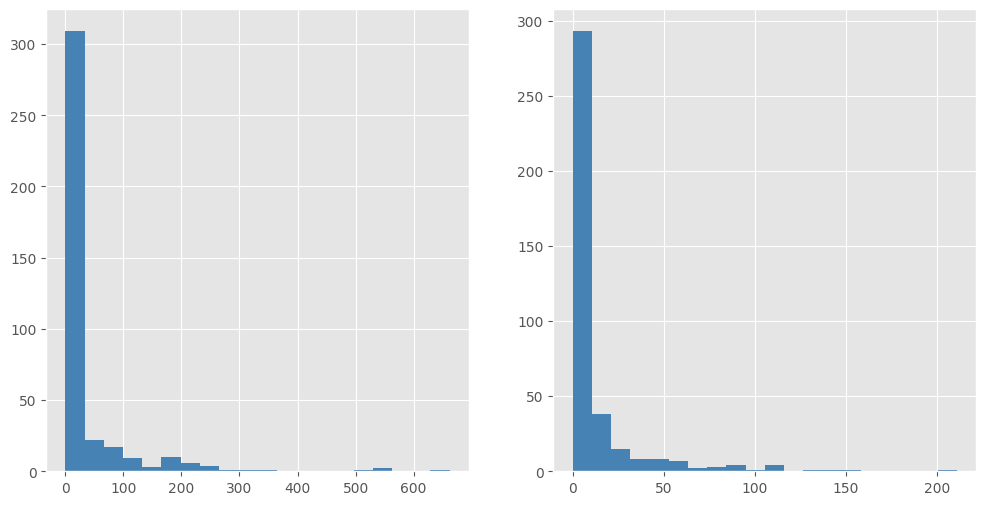

In [12]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)

plt.hist(df['score'], bins = 20, color = 'steelblue')

plt.subplot(1,2,2)

plt.hist(df['num_comments'], bins = 20, color = 'steelblue')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


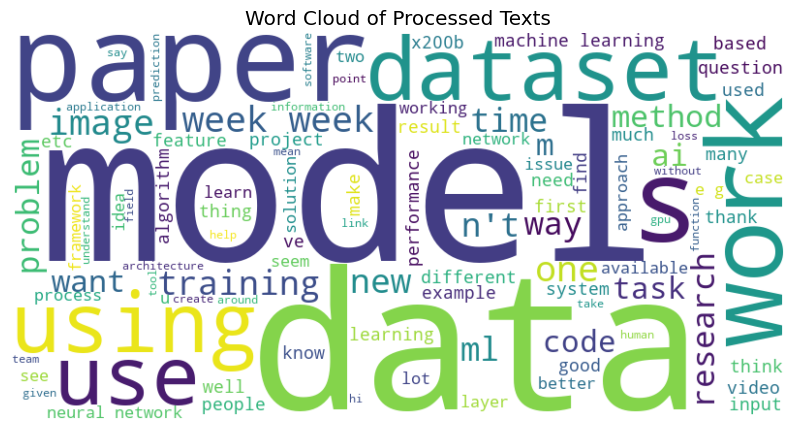

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Check if the value is a string
    if isinstance(text, str):
        pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        
        # Apply regex to remove links
        text = re.sub(pattern, '', text)
        
        # Tokenization
        tokens = word_tokenize(text.lower())  # Convert to lowercase during tokenization
        
        # Remove punctuation
        tokens = [word for word in tokens if word not in string.punctuation]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        # Join tokens back to a single string
        processed_text = ' '.join(tokens)
        
        return processed_text
    else:
        return str(text)  # Convert non-string values to string

processed_texts = df['body'].apply(lambda x: preprocess_text(x))

# Join all processed texts into a single string
all_text = ' '.join(processed_texts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Texts')
plt.show()


### HANDLE Contractions ### !!!!!!


Mean Squared Error: 20.030865573934282


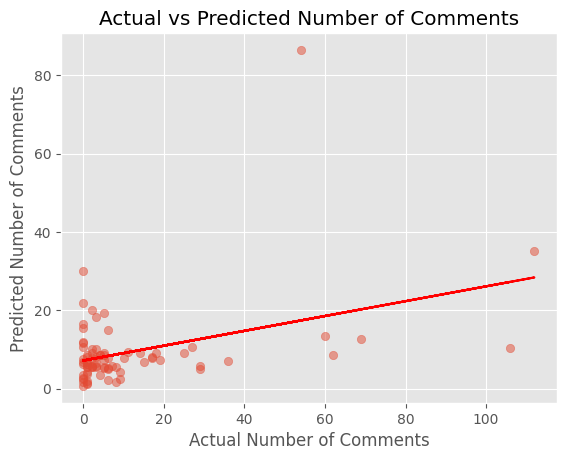

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

# Target variable
y = df['num_comments']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", np.sqrt(mse))

# Create a scatter plot comparing actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Number of Comments')
plt.ylabel('Predicted Number of Comments')
plt.title('Actual vs Predicted Number of Comments')

# Add a trendline (optional)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.show()



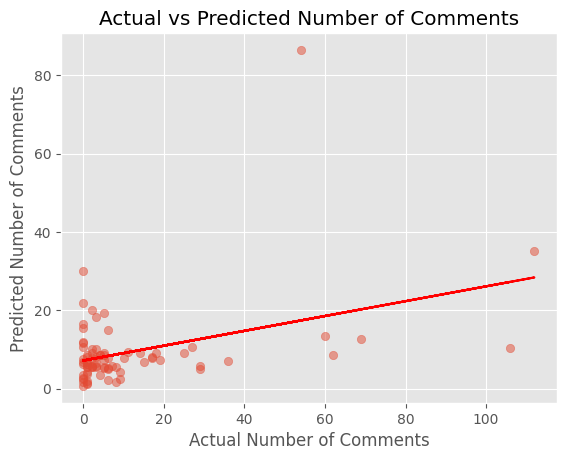

In [15]:
# Create a scatter plot comparing actual vs predicted values
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual Number of Comments')
plt.ylabel('Predicted Number of Comments')
plt.title('Actual vs Predicted Number of Comments')

# Add a trendline (optional)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')

plt.show()


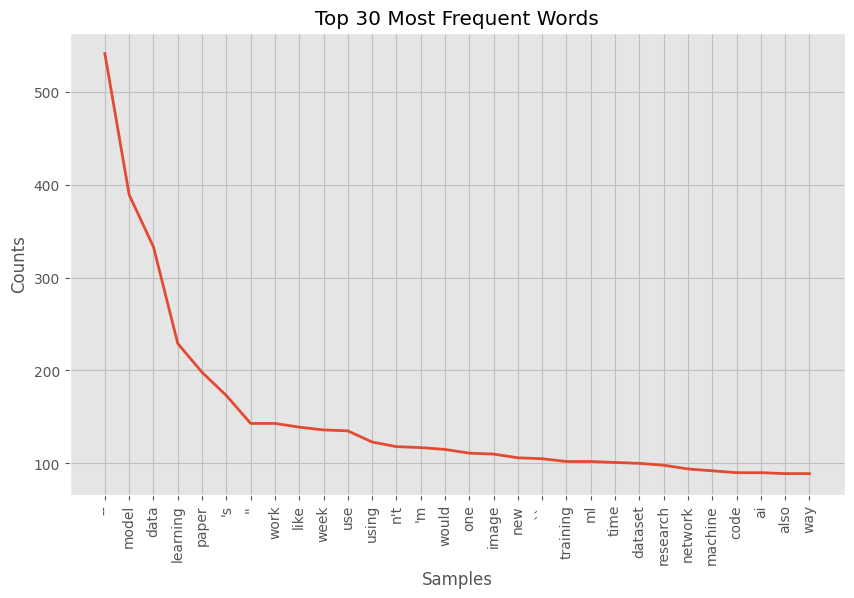

<AxesSubplot: title={'center': 'Top 30 Most Frequent Words'}, xlabel='Samples', ylabel='Counts'>

In [16]:
from nltk.probability import FreqDist

# Join all processed texts into a single string
all_text = ' '.join(processed_texts)

# Generate a frequency distribution
tokens = all_text.split()
freq_dist = FreqDist(tokens)

# common_words = freq_dist.most_common(20)
# print(common_words)

# Plot the frequency distribution
plt.figure(figsize=(10, 6))
plt.title('Top 30 Most Frequent Words')
freq_dist.plot(30, cumulative=False)

In [17]:


# subreddit Tweets database
# df = pd.read_csv('MachineLearning_reddit.csv')
# len(df)



In [18]:


# inspect the data
df.columns



Index(['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body',
       'created', 'timestamp'],
      dtype='object')

In [19]:


df.head()



title  score      id  \
0                         [D] Simple Questions Thread     14  qorekl   
6   Walk-Forward Target Encoding and Data Leakage [D]      3  qtiqlw   
7       [N] Introduction to Data Science book updated      0  qtlmql   
9             [D] Analysis of ICLR 2022 Review Scores     24  qszmuu   
10  [P] Lyric Studio - Artificial Intelligence Son...      1  qtik3a   

          subreddit                                                url  \
0   MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
6   MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
7   MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
9   MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
10  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   

    num_comments                                               body  \
0             54  Please post your questions here instead of cre...   
6              1  Hi!\r\n\r\nI am working on a time series probl...   
7              0  Hello All,\r\n\r\nI have updated my ongoing Da...   
9              1  We analysed the relationship between ICLR 2022...   
10             0  I created this demo in two days (last weekend)...   

         created            timestamp  
0   1.636301e+09  2021-11-07 17:00:18  
6   1.636867e+09  2021-11-14 06:15:27  
7   1.636879e+09  2021-11-14 09:39:13  
9   1.636804e+09  2021-11-13 12:45:06  
10  1.636866e+09  2021-11-14 06:04:08

In [20]:


# compare the subreddits
# df.groupby(['subreddit', 'sentiment']).size().unstack().plot(kind='bar',figsize=(11, 5))



In [21]:

df['subreddit'] = df['subreddit']
df['sentiment'] = 'neutral'
# how about the tweets?
df = df[['sentiment', 'subreddit','body' ]]
df.head()



sentiment        subreddit  \
0    neutral  MachineLearning   
6    neutral  MachineLearning   
7    neutral  MachineLearning   
9    neutral  MachineLearning   
10   neutral  MachineLearning   

                                                 body  
0   Please post your questions here instead of cre...  
6   Hi!\r\n\r\nI am working on a time series probl...  
7   Hello All,\r\n\r\nI have updated my ongoing Da...  
9   We analysed the relationship between ICLR 2022...  
10  I created this demo in two days (last weekend)...

In [22]:


#filtering dataset for United
df = df[df['subreddit']=='MachineLearning'] 
print(len(df))
df = df.reset_index(drop = True)
df.head(10)



387


sentiment        subreddit  \
0   neutral  MachineLearning   
1   neutral  MachineLearning   
2   neutral  MachineLearning   
3   neutral  MachineLearning   
4   neutral  MachineLearning   
5   neutral  MachineLearning   
6   neutral  MachineLearning   
7   neutral  MachineLearning   
8   neutral  MachineLearning   
9   neutral  MachineLearning   

                                                body  
0  Please post your questions here instead of cre...  
1  Hi!\r\n\r\nI am working on a time series probl...  
2  Hello All,\r\n\r\nI have updated my ongoing Da...  
3  We analysed the relationship between ICLR 2022...  
4  I created this demo in two days (last weekend)...  
5  I will soon be building a deep learning machin...  
6   **Video**\r\n\r\n[https://youtu.be/LKixq2S2Pz...  
7  Generally any application software co-exists w...  
8  A recent paper [On Buggy Resizing Libraries an...  
9  Are you looking for a time series feature extr...

<AxesSubplot: xlabel='sentiment'>

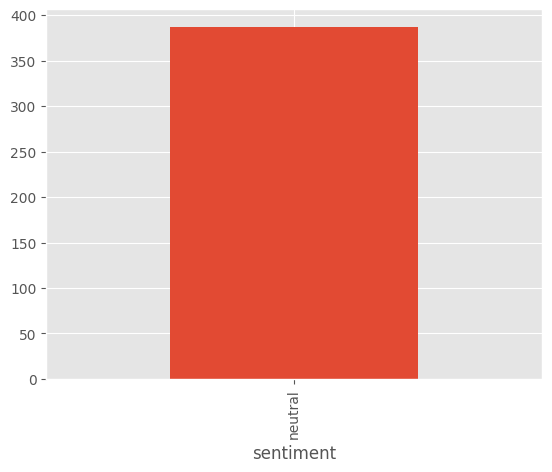

In [23]:


df.groupby('sentiment').size().plot(kind='bar')



In [24]:


# move to sentiment analysis
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)  #call the polarity analyzer
    print("{:-<40} {}".format(sentence, str(snt)))



In [25]:


# compound value scale = -1 to 1 (-ve to +ve)
print_sentiment_scores("United flight was a bad experience")



United flight was a bad experience------ {'neg': 0.376, 'neu': 0.323, 'pos': 0.301, 'compound': -0.1779}


In [26]:


get_ipython().run_line_magic('time', '# to calulate the time it takes the algorithm to compute a VADER score')
i=0 # counter

compval1 = [ ] # empty list to hold our computed 'compound' VADER scores

while (i<len(df)):

    k = analyser.polarity_scores(str(df.iloc[i]['body']))
    compval1.append(k['compound'])
    
    i = i+1
    
# convert sentiment values to numpy for easier usage
compval1 = np.array(compval1)
len(compval1)



CPU times: total: 0 ns
Wall time: 0 ns


387

In [27]:


df['VADER score'] = compval1



In [28]:


get_ipython().run_line_magic('time', '')

# assign score categories and logic
i = 0

predicted_value = [ ] # empty series to hold our predicted values

while(i<len(df)):
    if ((df.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((df.iloc[i]['VADER score'] > 0) & (df.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((df.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1



CPU times: total: 0 ns
Wall time: 0 ns


In [29]:


df['predicted sentiment'] = predicted_value



In [30]:


# which classifications were correct?
madeit = df



In [31]:


len(madeit)/len(df)



1.0

<AxesSubplot: xlabel='predicted sentiment'>

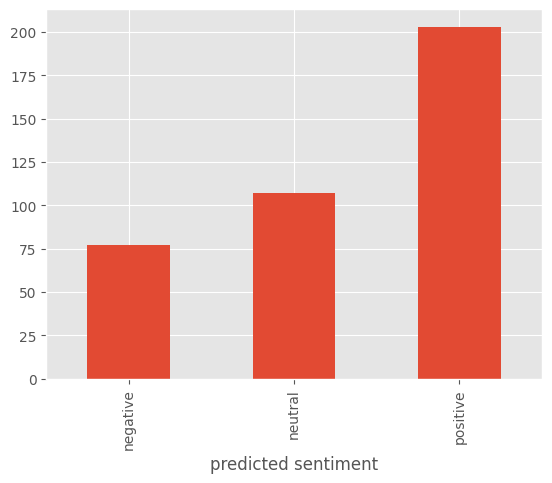

In [32]:


df.groupby('predicted sentiment').size().plot(kind='bar')



In [33]:

# some basic visualization
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

# df = madeit[madeit['predicted sentiment']=='negative']

words = ' '.join(df['body'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = set(STOPWORDS)
# stopwords.add("amp")
# stopwords.add("flight")
# stopwords.add("united")
# stopwords.add("plane")
# stopwords.add("now")

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)



In [64]:


df = madeit[madeit['predicted sentiment']=='negative']

words = ' '.join(df['body'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

stopwords = list(STOPWORDS)
stopwords.append("model")
stopwords.append("learning")
stopwords.append("training")
stopwords.append("data")
stopwords.append("paper")
stopwords.append("image")
stopwords.append("problem")
stopwords.append("machine")
stopwords += ['patient','use', 'using']

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)



In [35]:
type(cleaned_word)


str

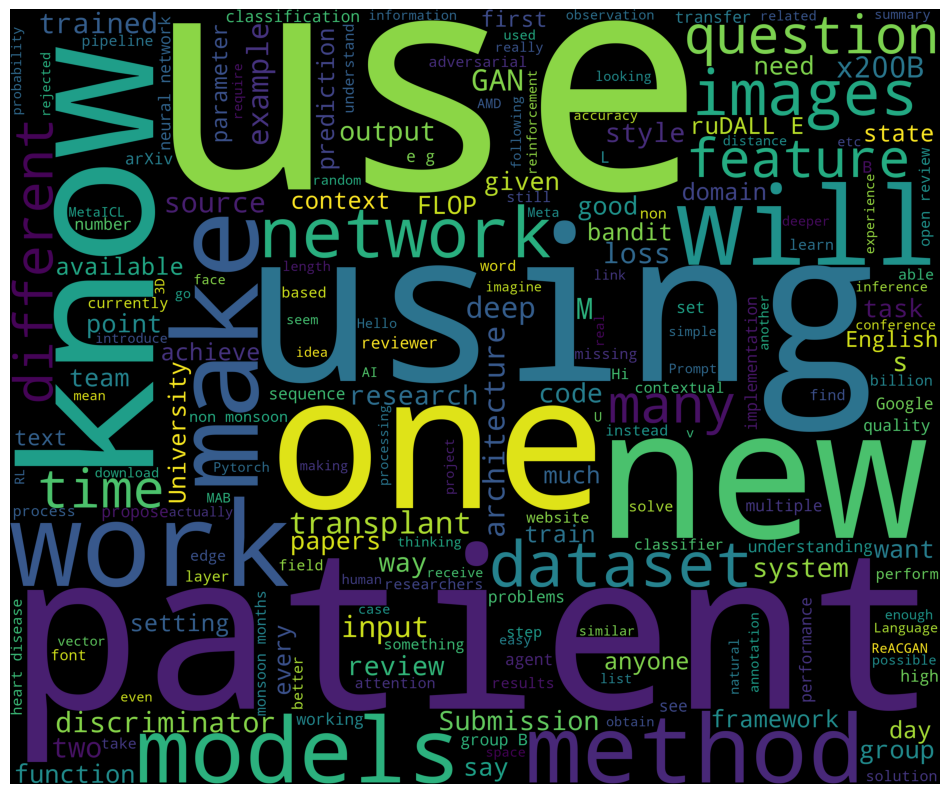

In [36]:


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [65]:
tokenizer = RegexpTokenizer(r'\w+') # tokenizer
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append('oh')
# stop_words.append('oh-oh')
# stop_words.append('ooh')
stop_words.append('are')

tf_vectorizer = CountVectorizer(encoding = 'utf-8', # if bytes to analyze, this encoding will be used
                                decode_error = 'strict', # if we want to get an error in case of encoding error
                                strip_accents = None, # if we want to do something we accents
                                
                                lowercase = True, # all letters to lower case 
                                stop_words = stopwords, # what stopwords do we want to use 
                                ngram_range = (1, 3), # what kind of ngrams do we want 
                                
                                max_df = 1, # filtering with document frequency
                                min_df = 0.0, # filtering with document frequency
                                max_features = None, # if we want to use only the tokens with top document frequency
                                
                                tokenizer = tokenizer.tokenize # tokenizer
)

tf = tf_vectorizer.fit_transform(df['body']) # using raw data for now
tf_feature_names = tf_vectorizer.get_feature_names_out() # feature names

# more about CountVectorizer(): https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#examples-using-sklearn-feature-extraction-text-countvectorizer
tokenizer = RegexpTokenizer(r'\w+') # tokenizer

tfidf_vectorizer = TfidfVectorizer(encoding = 'utf-8', # if bytes to analyze, this encoding will be used
                                   decode_error = 'strict', # if we want to get an error in case of encoding error
                                   strip_accents = None, # if we want to do something we accents
                                   
                                   lowercase = True, # all letters to lower case 
                                   stop_words = stopwords, # what stopwords do we want to use 
                                   ngram_range = (1, 3), # what kind of ngrams do we want 
                                   
                                   max_df = 1, # filtering with document frequency
                                   min_df = 0.0, # filtering with document frequency
                                   max_features = None, # if we want to use only the tokens with top document frequency
                                   
                                   tokenizer = tokenizer.tokenize # tokenizer
)

tfidf = tfidf_vectorizer.fit_transform(df['body']) # using raw data for now
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out() # feature names

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'm', 'mustn', 're', 's', 'shan', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [66]:
def plot_top_words(model, feature_names, n_top_words, title = '', subplotx = 2, subploty = 5):
    fig, axes = plt.subplots(subplotx, subploty, figsize=(60, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=30)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=1.5, bottom=0.05, wspace=2.5, hspace=0.3)
    plt.show()

In [67]:
# tf_vectorizer = CountVectorizer(ngram_range = (1, 3),
#                                 max_df = 0.725, #filtering with document frequency
#                                 min_df = 10/len(df['body']), ##filtering with document frequency
#                                 tokenizer = tokenizer.tokenize
# )

tf = tf_vectorizer.fit_transform(df['body'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lsa = TruncatedSVD(n_components = 21, 
                   n_iter = 25,
                   random_state = 42)

model = lsa.fit_transform(tf)

for index, component in enumerate(lsa.components_):
    zipped = zip(tf_feature_names, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    
    print("Topic "+str(index)+": ",top_terms_list)



Topic 0:  ['transplant', 'patients', 'group', 'group b', 'group patients', 'benefit', 'bias', 'survivorship', 'survivorship bias', 'transplant benefit']
Topic 1:  ['guoqiangwei', 'guoqiangwei xyz', 'guoqiangwei xyz htmls', 'htmls', 'https guoqiangwei', 'https guoqiangwei xyz', 'xyz htmls', 'iclr2022', 'reviewers', 'submissions']
Topic 2:  ['reinforcement', 'salina', 'decision', 'sequential decision', 'platforms', '07910', '07910 pdf', '2110 07910', '2110 07910 pdf', 'arxiv org pdf']
Topic 3:  ['monsoon', 'monsoon months', 'non monsoon', 'non monsoon months', 'water', 'forecasting', 'water level', 'deletion', 'discard', 'discard non']
Topic 4:  ['albedo', 'face', 'adversarial loss', 'albedo 𝐴crop', 'crop', 'predicted', 'predicted albedo', '𝐴crop', 'crop face', 'predicted albedo 𝐴crop']
Topic 5:  ['disease', 'heart', 'heart disease', 'keras', 'important', 'expect', 'makes uncomfortable', 'uncomfortable', 'whether', 'whether heart']
Topic 6:  ['bandit', 'contextual', 'mab', 'observation',

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 119860 (\N{MATHEMATICAL ITALIC CAPITAL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


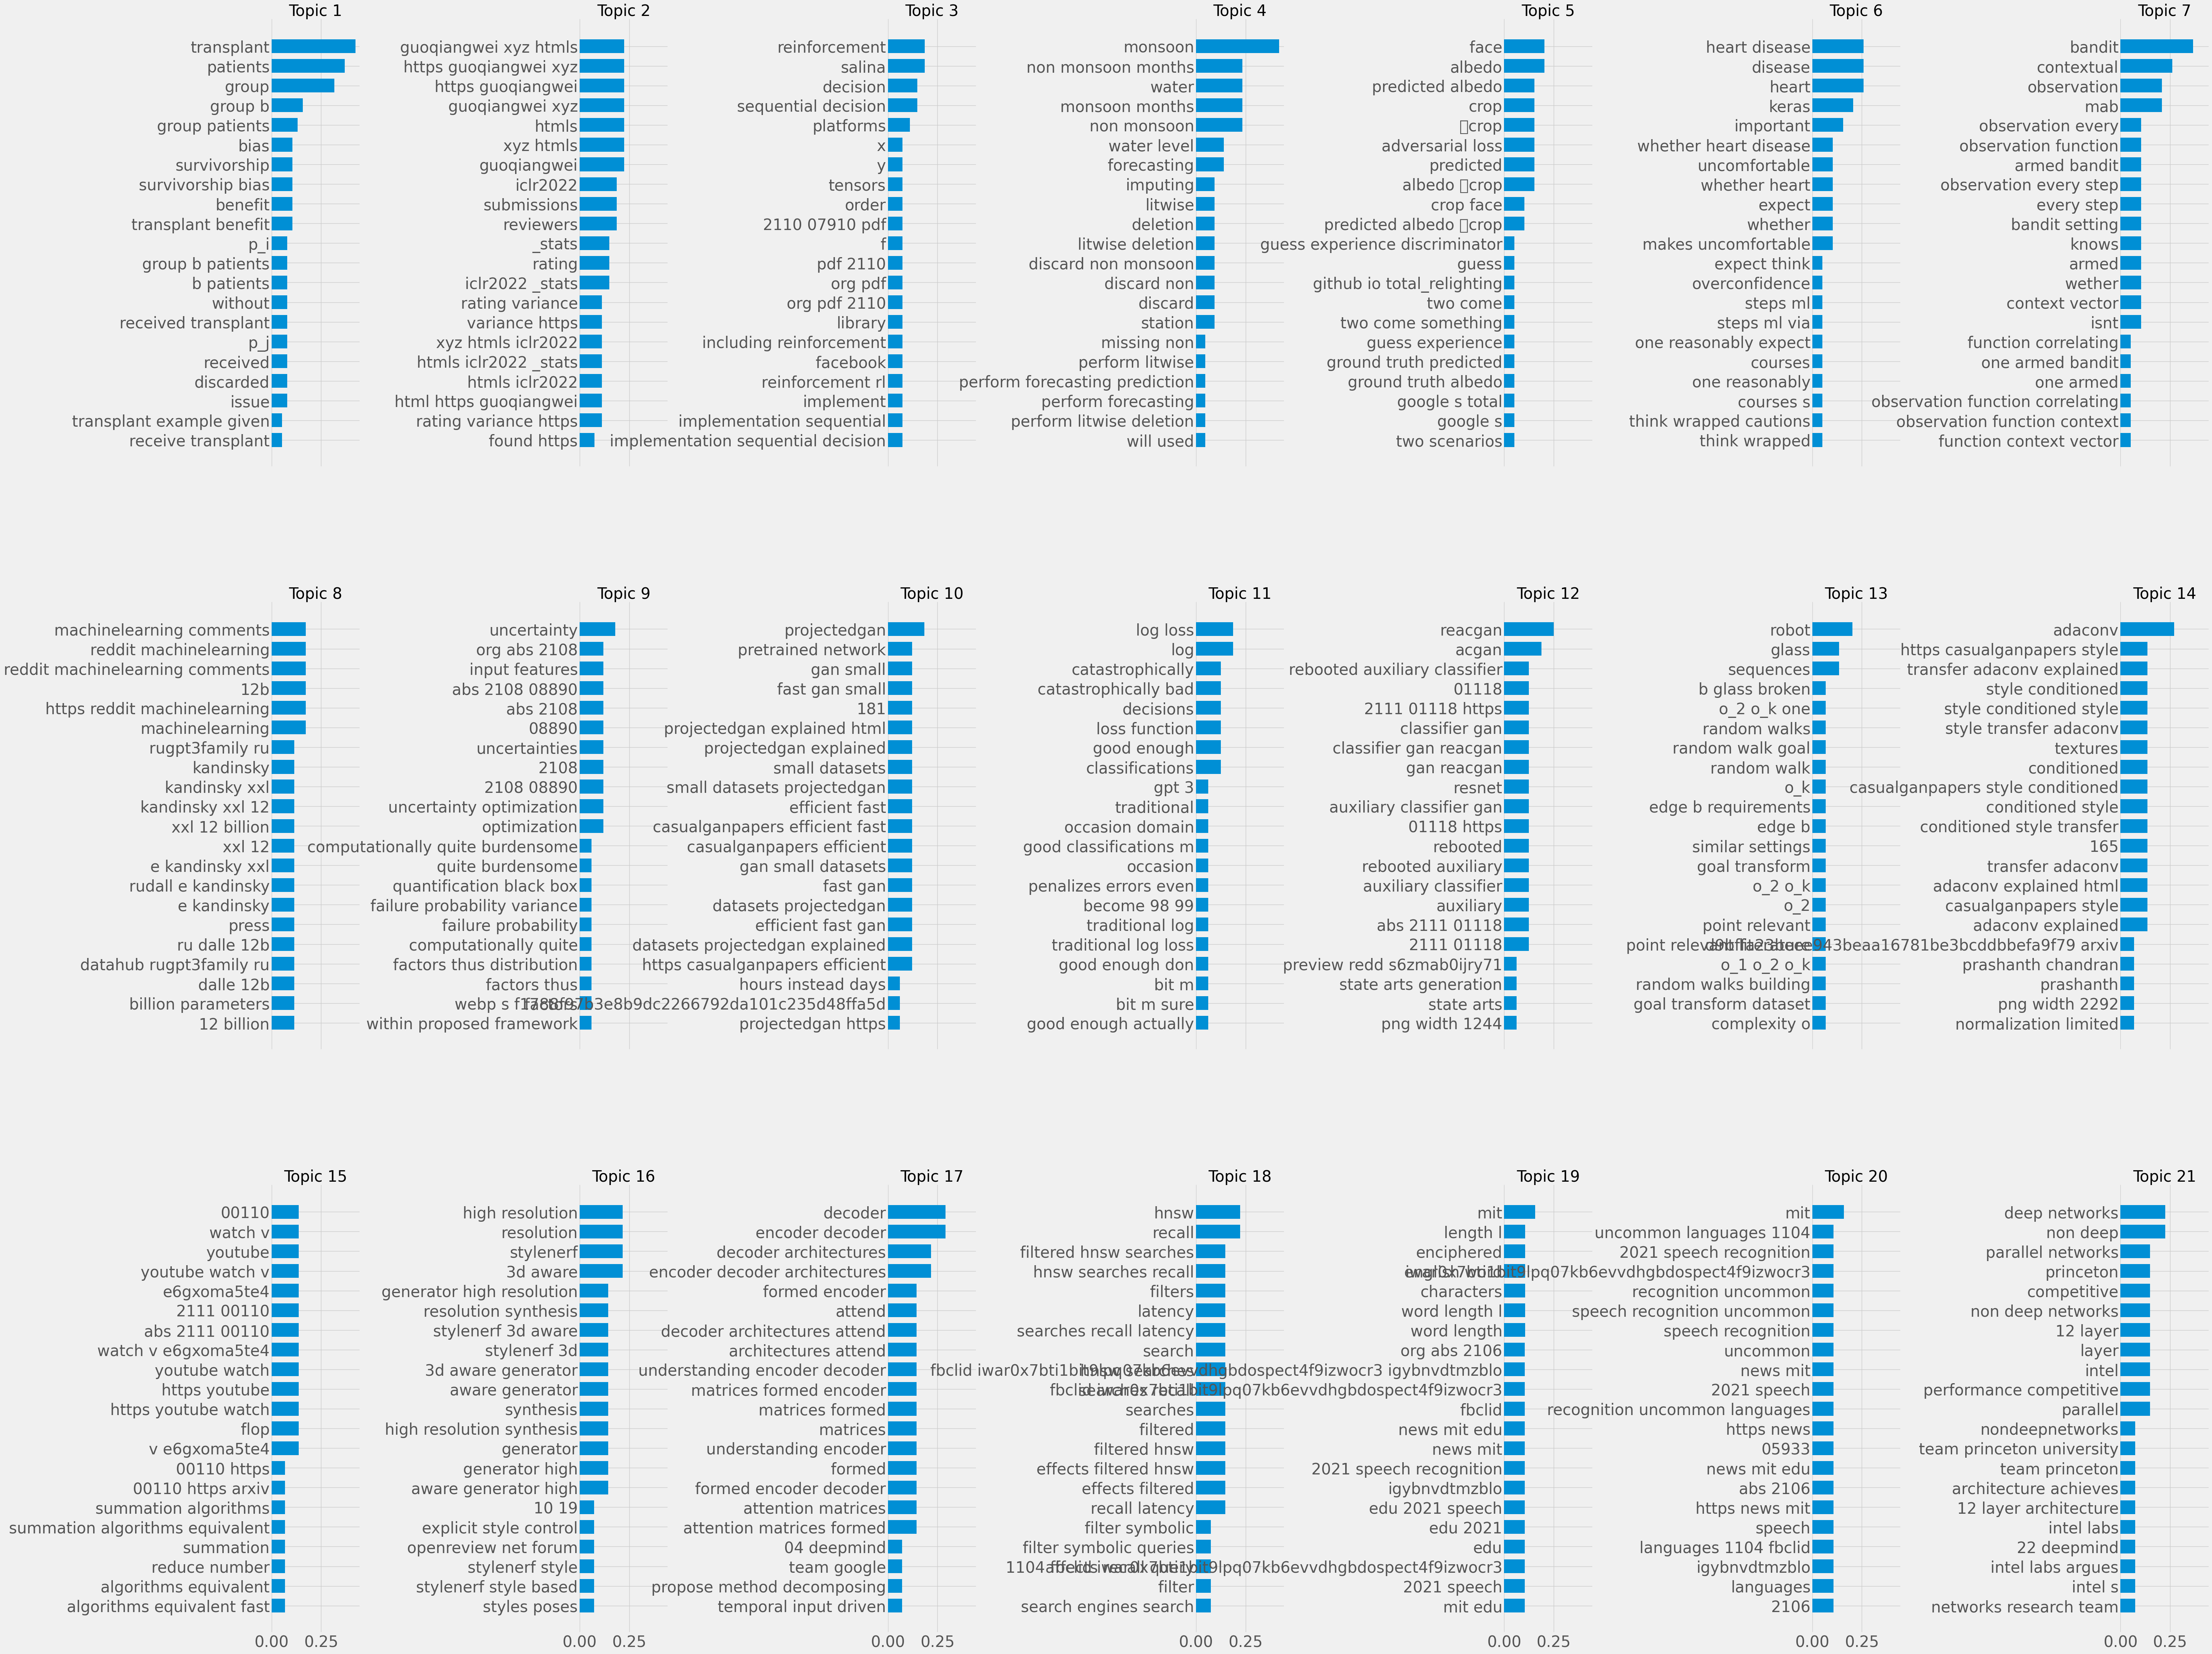

In [68]:
plot_top_words(lsa, tf_feature_names, 21, title = '', subplotx = 3, subploty = 7)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Trying parameters: 2
Trying parameters: 3
Trying parameters: 4
Trying parameters: 5
Trying parameters: 6
Trying parameters: 7
Trying parameters: 8
Trying parameters: 9
Trying parameters: 10
Trying parameters: 11
Trying parameters: 12
Trying parameters: 13
Trying parameters: 14
Trying parameters: 15
Trying parameters: 16
Trying parameters: 17
Trying parameters: 18
Trying parameters: 19
Trying parameters: 20
Trying parameters: 21
Trying parameters: 22
Trying parameters: 23
Trying parameters: 24
Trying parameters: 25


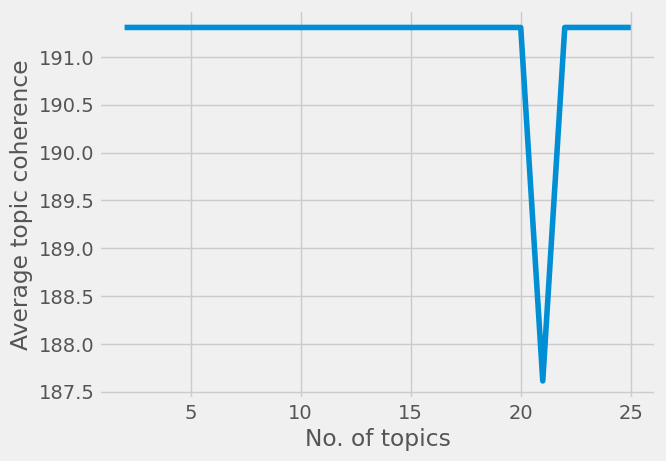

In [49]:
tf = tf_vectorizer.fit_transform(df['body'])
f_feature_names = tf_vectorizer.get_feature_names_out()

topic_coherence_specific = []

def get_topic_coherence(dt_matrix, topic, n_top_words):
    indexed_topic = zip(topic, range(0, len(topic)))
    topic_top = sorted(indexed_topic, key=lambda x: 1 - x[0])[0:n_top_words]
    coherence = 0
    for j_index in range(0, len(topic_top)):
        for i_index in range(0, j_index - 1):
            i = topic_top[i_index][1]
            j = topic_top[j_index][1]
            coherence += get_umass_score(dt_matrix, i, j)
    return coherence

def get_umass_score(dt_matrix, i, j):
    zo_matrix = (dt_matrix > 0).astype(int)
    col_i, col_j = zo_matrix[:, i], zo_matrix[:, j]
    col_ij = col_i + col_j
    col_ij = (col_ij == 2).astype(int)    
    Di, Dij = col_i.sum(), col_ij.sum()    
    return math.log((Dij + 1) / Di)

def get_average_topic_coherence(dt_matrix, topics, n_top_words):
    total_coherence = 0
    for i in range(0, len(topics)):
        total_coherence += get_topic_coherence(dt_matrix, topics[i], n_top_words)
    return total_coherence / len(topics)

for n_topics in range(2,26,1):
    
    print('Trying parameters:', n_topics)
    
    lsa = TruncatedSVD(n_components = n_topics, n_iter = 25, random_state = 42) 
    #less iterations used above to not wait till tomorrow, results will be less precise though
                
    lsa.fit_transform(tf)
                
    avg_coherence = get_average_topic_coherence(tf, lsa.components_, 25)
    
    topic_coherence_specific.append([avg_coherence, n_topics])
# below, we make the output (list) a pandas DataFrame with intuitive colnames
topic_coherence_specific_df = pd.DataFrame(topic_coherence_specific).rename(columns={
    0: 'avg_coherence', 1: 'n_topics'
})

save_object(topic_coherence_specific_df, 'outputs/topic_coherence_lsa_countvectotizer.pkl')
with open("outputs/topic_coherence_lsa_countvectotizer.pkl", "rb") as fp:
    topic_coherence_specific_df = pickle.load(fp)
plt.style.use("fivethirtyeight")
plt.plot(topic_coherence_specific_df['n_topics'],topic_coherence_specific_df['avg_coherence'])
plt.xlabel("No. of topics")
plt.ylabel("Average topic coherence")
plt.show()